# Berlin Airbnb Data Analysis February 2020

## Udacity Nanodegree Data Science Project: Write a Data Science Blog Post


### Motivation
This project is part of Udacity's Nanodegree in Data Science and will be implemented following the CRISP-DM methodology.
The results are published in an accompanying blog on medium:   ...

The choice of the dataset was personally motivated as well, since I am a native german and like to travel. For this project, I was interestested in data which was scrapped in February 2020 to **better understand the following questions:**
* How expensive is an overnight stay in Berlin? What are minimum, average, typical or maximum prices?
* How does the cost vary depending on the month, day or part of the city?
* How does the cost vary depending on the neighbourhood in the city?
* Is there a correlation between price of a listing and user rating?

### Dataset
The dataset was originally collected by **Murray Cox' Inside Airbnb project**  by compiling publically aviable data fo **Berlin, Germany at  18. February 2020**: http://insideairbnb.com/get-the-data.html .
The data is avaible under a Creative Commons CC0 1.0 Universal (CC0 1.0) "Public Domain Dedication" license.

The CSV files come in **two variants**, a **detailed variant** (compressed in an gz archive with more columns) and a smaller less-detailed variant. We will focuse on the detailed variant, thus only that data is provided here. To run the main file, you need to unpack the archives first.

### Necessary Files
All files necessary for analysis and visualisation are included in the Github respository and are as followed:
* **Airbnb_BerlinAnalysis.ipynb**: notebook containing the code and representation.
* **calendar.csv.gz**: a compressed CSV file containing **detailled** information on availability, date and prices of all AirBnB listings in Berlin between 18. February 2020 and 17. February 2021.
* **listings.csv.gz**: a compressed CSV file containing **detailled** information on the listings.


### Aknowledgement
Murray Cox' Inside Airbnb project for collecting and hosting the AirBnB Data.
A multitude of Stackoverflow users whose questions and answers I found, when I was stuck on a pandas related coding problem.

## Details to the implementation of the CRISP-DM methodology

### 1. Business Understanding

In this step we need to understand the problem, e.g. which questions we want to answer with the data. A first step is to read the source of the dataset and understand the intention of the author. Since I enjoy travelling and I'm a native german, the following questions are interesting to me:
* How expensive is an overnight stay in Berlin? What are minimum, average, typical or maximum prices?
* How does the cost vary depending on the month or day?
* How does the cost vary depending on the neighbourhood in the city?
* Is there a correlation between price and user rating?

### 2. Data Understanding

We need to gain an understanding of the data necessary, to answer the questions we want to answer. This requires the understand which files are provided and which information they contain.


### 3. Data Preparation
After asking questions and understanding the required data, the corresponding data will be cleaned and wrangled. This includes identifying datatypes, the number of missing values as well as outliers and how to deal with them.


### 4. Modeling
A model is not necessary to answer our questions.
### 5 Evaluation

We will evaluate our results by employing NumPy and pandas for analysis of the data. Matplotlib and seaborn are employed for visualisation.

### 6. Deployment
The data is presented in a web blog on medium:

## Data Understanding - Lets have a look at the data

In [1]:
##load dependencies
import pandas as pd
pd.options.display.float_format = '${:,.2f}'.format#formats printout
pd.set_option('display.max_columns', None)#allows to print out all columns
pd.set_option('display.max_rows', None)#allows to print out all rows
pd.options.mode.chained_assignment = None  # default='warn' - changes some of the overwrite warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
%matplotlib inline

In [2]:
##load data
df_calendar = pd.read_csv('Airbnb_BerlinData_Feb_2020/calendar.csv')#This file contains information about availability, date and price
df_listings = pd.read_csv('Airbnb_BerlinData_Feb_2020/listings.csv')#This file contains iformation on the overnight stays

c:\users\marti\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
##Get a quick look at a dataFrame of choice
print(df_calendar.columns)
print(df_listings.columns)

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)


In [4]:
#This shows that we have over 25K different unique listing offers
df_listings['id'].value_counts().shape

(25197,)

We can see, that the listings dataframe contains a large amount of columns. The calendar dataframe contain less data should be easier to handle.

#### Investigate the data types
We should investigate the data types inside the columns next and after that, if data is missing. The data type is relevant for the decission, how to deal with missing data.

In [5]:
#Investigating a few relevant data types as example
df_calendar.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

We can see, that **the dates and prices are saved a string!**

In [6]:
df_listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

Again the price is a string. We have longitude and lattitude, which are floats and does could be easily handled like x and y coordinates. The many review score metrics are floats as well. Furthermore, there are two neighbourhood columns: neighbourhood and neighbourhood_cleansed. 

In [7]:
##Lets checkout the neighbourhoods - this prints out the number of unique values in the respective columns
print(df_listings['neighbourhood'].value_counts().shape)
print(df_listings['neighbourhood_cleansed'].value_counts().shape)
print(df_listings['neighbourhood_cleansed'].dtype)

(92,)
(137,)
object


The cleansed column contains more "unique" neighbourhoods. Thus we should work with that column. We now know which data and which type we have. The next step is processing the data.

## Data Preparation - Lets wrangle and clean the data

 Since we established, what kind of questions we want to answer, we can drop the not necessary columns at this point.

In [8]:
#This drops the colums which don't match the filter request
df_listings=df_listings.filter(['id','name','space','listing_url','summary','description','price','neighbourhood',
                                'neighbourhood_cleansed','latitude','longitude','room_type','review_scores_rating',
                                'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                                'review_scores_communication','review_scores_location','review_scores_value'])

In [9]:
df_listings.columns

Index(['id', 'name', 'space', 'listing_url', 'summary', 'description', 'price',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'room_type', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [10]:
#Lets print a few rows as example to show why they are strings.
print(df_calendar['price'].head())
print(df_calendar['date'].head())

0    $60.00
1    $60.00
2    $60.00
3    $65.00
4    $65.00
Name: price, dtype: object
0    2020-02-19
1    2020-02-18
2    2020-02-19
3    2020-02-20
4    2020-02-21
Name: date, dtype: object


The date is a string, we should convert that to into a timestamp. The price is a string, because it contains the unit dollar. **Lets convert the data types.**

In [11]:
#Convert the price string into a number with the unit dollar
df_calendar['price']=df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)
#We repeat this for the other data frame
df_listings['price']=df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

print('The listed prices ranges from {} $ to {} $.'.format(df_calendar['price'].min(),df_calendar['price'].max()))

#converting the dates into dtype datetime64 - Luckily, there directly exists a pandas function for this.
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
print('The listed date ranges from {} to {}.'.format(df_calendar['date'].min(),df_calendar['date'].max()))
#extracting month and day from timestamp -  Even more conveniently, a function exists to directly extract the month or day.
df_calendar['month'] = df_calendar['date'].dt.month_name()
df_calendar['day'] = df_calendar['date'].dt.day_name()

The listed prices ranges from 8.0 $ to 900000.0 $.
The listed date ranges from 2020-02-18 00:00:00 to 2021-02-17 00:00:00.


In [12]:
#The price data is now in a prober format, lets get a quick look
print(df_calendar['price'].describe())
print(df_calendar['date'].describe())

count   $9,197,068.00
mean           $79.95
std         $3,028.57
min             $8.00
25%            $35.00
50%            $50.00
75%            $80.00
max       $900,000.00
Name: price, dtype: float64
count                 9197068
unique                    366
top       2020-07-05 00:00:00
freq                    25197
first     2020-02-18 00:00:00
last      2021-02-17 00:00:00
Name: date, dtype: object


So now we have the proper datatypes. What comes to mind now is, that the standard deviation of the price is quite large. We will adress this later. Next we should checkout, how much of the data is missing and how to deal with that.

**How much of the data is missing?**

In [13]:
def missingData(df):
    'returns percentage of the missing data'
    return df.isnull().mean()*100   
missingData(df_calendar)

listing_id       $0.00
date             $0.00
available        $0.00
price            $0.00
adjusted_price   $0.00
minimum_nights   $0.00
maximum_nights   $0.00
month            $0.00
day              $0.00
dtype: float64

Minimum and maximum nights has approxiately 1e-05% data missing. This can be safely dropped.

In [14]:
df_calendar=df_calendar.dropna()

In [15]:
missingData(df_listings)#lets check out the missing data for the listings csv

id                             $0.00
name                           $0.20
space                         $35.22
listing_url                    $0.00
summary                        $5.10
description                    $2.06
price                          $0.00
neighbourhood                  $0.00
neighbourhood_cleansed         $0.00
latitude                       $0.00
longitude                      $0.00
room_type                      $0.00
review_scores_rating          $19.68
review_scores_accuracy        $19.79
review_scores_cleanliness     $19.77
review_scores_checkin         $19.87
review_scores_communication   $19.80
review_scores_location        $19.86
review_scores_value           $19.88
dtype: float64

Quite a few entries are missing for the different review scores. Since we know they are numerical values, we should impute the missing values with the mean, to maintain the maximum amount of data.

In [16]:
fill_mean = lambda col: col.fillna(col.mean());#lambda function to impute values of a column
#impute the mean value by applying the lambda function, overwriting the old colums with the newly imputed
df_listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
             'review_scores_communication', 'review_scores_location', 'review_scores_value'
            ]]=df_listings[[
            'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
            'review_scores_communication', 'review_scores_location', 'review_scores_value'
            ]].apply(fill_mean, axis=0)

In [17]:
missingData(df_listings)

id                             $0.00
name                           $0.20
space                         $35.22
listing_url                    $0.00
summary                        $5.10
description                    $2.06
price                          $0.00
neighbourhood                  $0.00
neighbourhood_cleansed         $0.00
latitude                       $0.00
longitude                      $0.00
room_type                      $0.00
review_scores_rating           $0.00
review_scores_accuracy         $0.00
review_scores_cleanliness      $0.00
review_scores_checkin          $0.00
review_scores_communication    $0.00
review_scores_location         $0.00
review_scores_value            $0.00
dtype: float64

The other columns contain neglible amount of missing data. Since the corresponding datatypes are strings, we keep the NaN values for now. So neither price, adjusted price nor date contain missing data. Lets generate a new dataframe from the price and the review score, so we can later work easily with the data.

In [18]:
#An easy to handle dataframe for plotting later
df_reviewScores=df_listings[['price','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

After preparing the data, we are now prepared to answer the first questions.

## Question 1: How expensive is an overnight stay in Berlin?
#### How expensive is the minimum, average, maximum or typical stay?
This information is contained in the calendar dataframe.

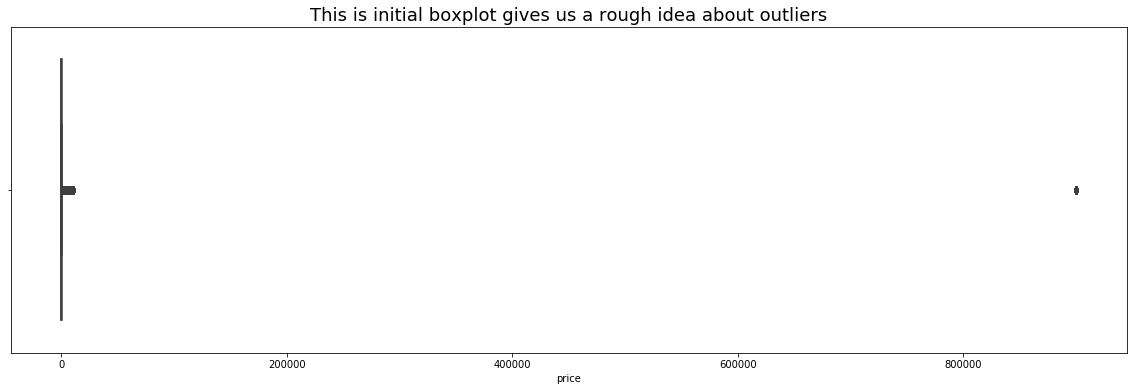

In [19]:
#The extremly high standard deviation earlier indicated outliers. A boxplot can easily identify this as well
plt.figure(figsize=(20,6))
plt.title('This is initial boxplot gives us a rough idea about outliers',fontsize = 18)
sns.boxplot(x=df_calendar['price']);

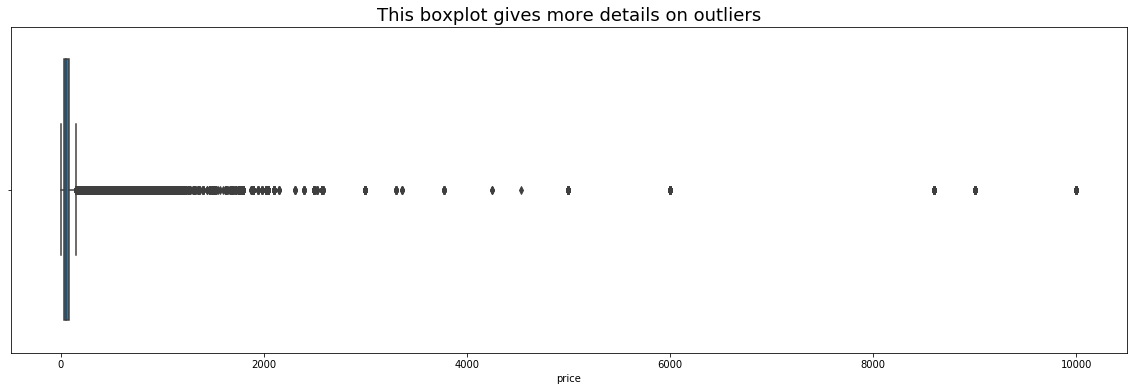

In [20]:
plt.figure(figsize=(20,6))
plt.title('This boxplot gives more details on outliers',fontsize = 18)
sns.boxplot(x=df_calendar[df_calendar['price'] < 9.000000e+05]['price']);

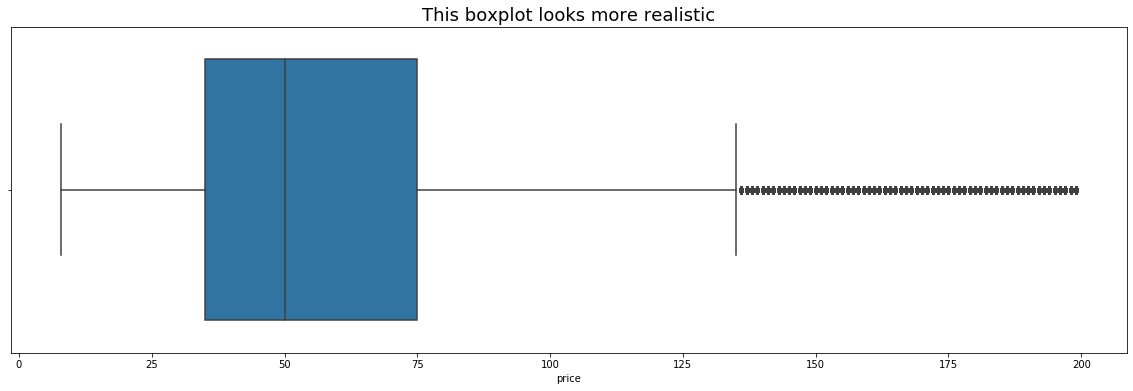

In [21]:
plt.figure(figsize=(20,6))
plt.title('This boxplot looks more realistic',fontsize = 18)
sns.boxplot(x=df_calendar[df_calendar['price'] < 2.000000e+02]['price']);

Lets look at the more extreme listings, which are indicated by the boxplot.

### What and where is the cheapest location?
To answer this we need to find the listing ids, whose price is equal to the minimum price. These are then grouped by listing_id for convenience.

In [22]:
#This gives out the number of unique values (.value_counts()) for the listing_id, where the value of the price is equal to its minimum
df_calendar['listing_id'].loc[df_calendar['price'] == df_calendar['price'].min()].value_counts()

2161434    365
Name: listing_id, dtype: int64

In [23]:
#Lets check out some data on this cheap listing offer
df_listings[['name','neighbourhood_cleansed','listing_url','price','space','description']].loc[df_listings['id']==2161434]

,name,neighbourhood_cleansed,listing_url,price,space,description
1393,Nice room in the heart of Berlin!,Karl-Marx-Allee-Süd,https://www.airbnb.com/rooms/2161434,$8.00,NaN,I have sometimes to leave my room in Berlin an...


So the cheapest price is for one single listing for 365 entries (a whole year). While information about the space is not avaiable, description reveals, that this is a single room in a shared appartement. Huh, neat!

### What and where is the most expensive location?
We can repreat the procedure from the cheapest location.

In [24]:
df_calendar['listing_id'].loc[df_calendar['price'] == df_calendar['price'].max()].value_counts()

9651871    104
Name: listing_id, dtype: int64

Again one single listing. Lets check it out.

In [25]:
#the id column in df_listins is id and not listing_id
df_listings[['name','neighbourhood_cleansed','listing_url','price','space','description']].loc[df_listings['id']==9651871]

,name,neighbourhood_cleansed,listing_url,price,space,description
5586,Über den Dächern Berlins Zentrum,Düsseldorfer Straße,https://www.airbnb.com/rooms/9651871,"$9,000.00","45 m² Einzimmerwohnung, 2 große Betten",Zentrale Lage direkt U-Bahnhof Augsburger Stra...


While this is an entire appartement and likely much bigger than the cheapest location, this means that either the price for the appartement is overcharged or that there has been a bug while collecting the dataset. Lets display the prices in a meaningful manner. This means omitting the outliers in the representation.

In [26]:
#calculation of the mimimum/average/maximum is now easy. 
meanPrice=df_calendar['price'].mean()
medianPrice=df_calendar['price'].median()
maxPrice=df_calendar['price'].max()
minPrice=df_calendar['price'].min()

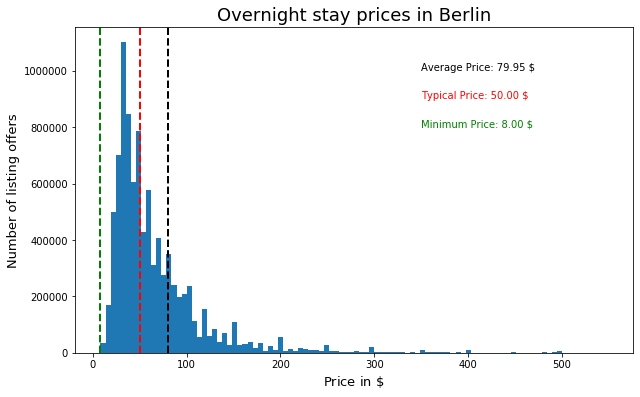

In [27]:
##Lets display the results in a meaningful manner
plt.figure(figsize=(10,6))
plt.title('Overnight stay prices in Berlin',fontsize = 18)
plt.xlabel('Price in $\$$',fontsize = 13)
plt.ylabel('Number of listing offers',fontsize = 13)
plt.axvline(meanPrice, color='k', linestyle='dashed', linewidth=2)
plt.text(350,1000000, 'Average Price: {:.2f} \$'.format(meanPrice))
plt.axvline(medianPrice, color='r', linestyle='dashed', linewidth=2)
plt.text(350,900000, 'Typical Price: {:.2f} \$'.format(medianPrice), color='r')
plt.axvline(minPrice, color='g', linestyle='dashed', linewidth=2)
plt.text(350,800000, 'Minimum Price: {:.2f} \$'.format(minPrice), color='g')
plt.hist(df_calendar[df_calendar['price']< 550]['price'], bins=100);

#### To summarize the results
The average price for an overnight stay in Berlin is approximately 80 \\$. However, the histogram clearly displays an asymetric distribution. The vertical line of the average price is shifted to right, which suggests the median or mode with 50 \\$ are more realistic metrics for the overnight stay price. An typical price of 50-80 \\$ is realistic from my own experience. Furthermore, it is possible to stay a night in Berlin for 8 \\$ buy renting a room in a shared flat.


However, the usefulness of these results is limited, as this doesn't factor in the month or location of the stay. If we consider this, we can achieve a more detailed picture. This naturally leads to the follow up question.


## Question 2: How do prices vary depending on the month or day?

In [28]:
#Grouping the values for the price by month
mean_pricePerMonth = df_calendar.groupby('month')[['price']].mean()
mean_pricePerMonth.transpose() #printing the transposed is abit tidier!

month,April,August,December,February,January,July,June,March,May,November,October,September
price,$77.61,$80.78,$78.60,$80.92,$84.18,$80.69,$79.35,$75.95,$80.80,$78.28,$81.23,$81.01


In [29]:
#Pandas seems to automatically sort or groupby months in alphabetical order, but we would like to rearrange this properly
#Sorting the values by month to get the distribution over the year
listOfMonths=["January", "February", "March","April", "May", "June", "July","August", "September", "October", "November", "December"]
reIndexedMean=mean_pricePerMonth.reindex(listOfMonths)
#The average of the average - averageception
reIndexedMean.mean()

price   $79.95
dtype: float64

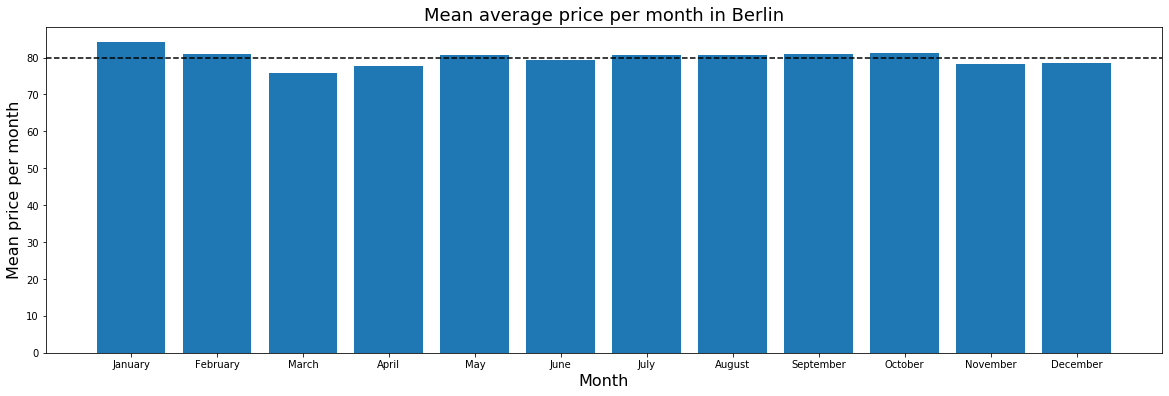

In [30]:
#lets display the results again
plt.figure(figsize=(20,6))
plt.title('Mean average price per month in Berlin',fontsize = 18)
plt.xlabel('Month',fontsize = 16)
plt.ylabel('Mean price per month',fontsize = 16)
treshold=float(reIndexedMean.mean())
plt.axhline(treshold,linestyle="dashed", color="black")#this line is meant to be a guide for the eye
plt.bar(reIndexedMean.index,'price',data=reIndexedMean);

We see a slight variation in the mean price. The dashed treshold line is useful guide for the eye here. It seems, january is the most expensive and march the cheapest time of the year. Lets repeat this for the median value.

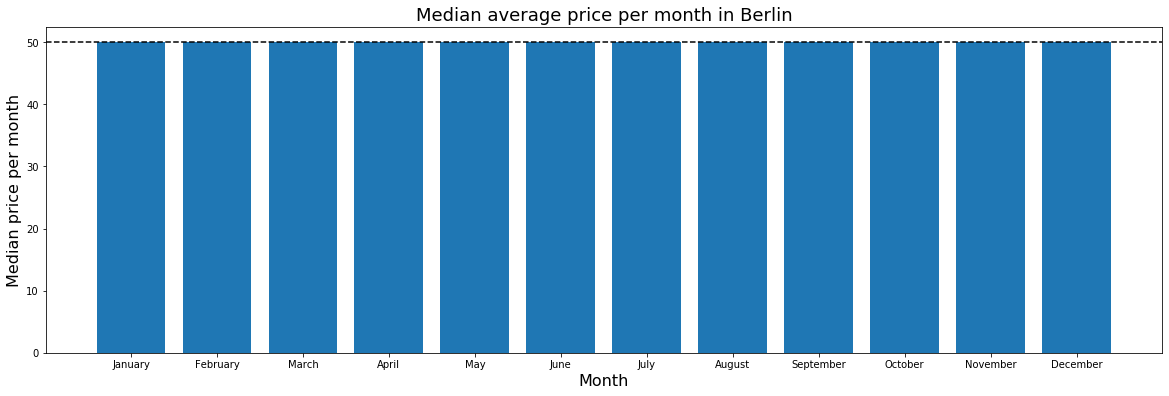

In [31]:
median_pricePerMonth = df_calendar.groupby('month')[['price']].median()
reIndexedMedian=median_pricePerMonth.reindex(listOfMonths)
#lets display the results again
plt.figure(figsize=(20,6))
plt.title('Median average price per month in Berlin',fontsize = 18)
plt.xlabel('Month',fontsize = 16)
plt.ylabel('Median price per month',fontsize = 16)
treshold=float(reIndexedMedian.mean())
plt.axhline(treshold,linestyle="dashed", color="black")
plt.bar(reIndexedMedian.index,'price',data=reIndexedMedian);

So the median value of 50 \\$ per night does not depend on the month. Lets repeat the procedure above for the day

In [32]:
#again rearrange the data by weekday and not alphabetical order of the days
listOfDays=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
mean_pricePerDay = df_calendar.groupby('day')[['price']].mean().reindex(listOfDays)
median_pricePerDay = df_calendar.groupby('day')[['price']].median().reindex(listOfDays)
median_pricePerDay.transpose() #again printing the transposed to tidy up

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
price,$50.00,$50.00,$50.00,$50.00,$50.00,$50.00,$50.00


The median price per day is again not very interesting, but the mean day shows a slight realistic dependency.

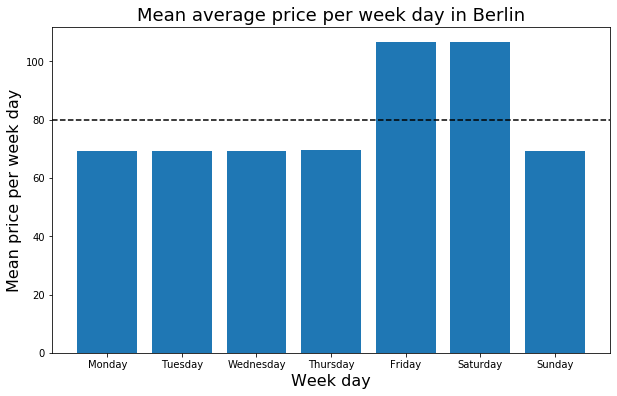

In [33]:
plt.figure(figsize=(10,6))
plt.title('Mean average price per week day in Berlin',fontsize = 18)
plt.xlabel('Week day',fontsize = 16)
plt.ylabel('Mean price per week day',fontsize = 16)
treshold=float(reIndexedMean.mean())
plt.axhline(treshold,linestyle="dashed", color="black")
plt.bar(mean_pricePerDay.index,'price',data=mean_pricePerDay);

#### To summarize the time dependency of the average price

The mean average of the price seems to be a useful indicator here. 
Friday and saturday seem to be more expensive on average, while january, september and october seem to be slightly more expensive than the other months. March is the cheapest month to visit.

Let's analyse next, which impact the neighbourhood has on the prices.

## Question 3: How do prices vary depending on the neighbourhood?

We need to analyze the csv file with the listing information. We now from the data understanding section, that there are two neighbourhood columnes. The one with the cleansed data containts the correct amount of neighbourhoods:

In [34]:
#Repeating the procedure from above - grouping by neighbourhood, taking the mean of the price and sorting by price
mean_pricePerNeighboorhood=df_listings.groupby('neighbourhood_cleansed')[['price']].mean().sort_values(by=['price'],ascending=False)
mean_pricePerNeighboorhood

,price
neighbourhood_cleansed,
Volkspark Wilmersdorf,$344.93
Forst Grunewald,$254.00
Schöneberg-Nord,$168.20
Frankfurter Allee Süd,$161.42
Alexanderplatz,$139.96
Haselhorst,$133.50
Regierungsviertel,$121.61
Düsseldorfer Straße,$116.22
Allende-Viertel,$115.67


**As we can see has the neighbourhood a very strong impact on the price.** A bar or pie chart as visualisation are not very useful for 137 different neighbourhoods! So we should try a different visualisation here. Since it is possible to visualise the listings on the **Inside Airbnb project** website as a map, I am inclined to recreate a comparable map for the listings and neighbourhoods as well.

## Let's attempt to visualise the neighbourhoods

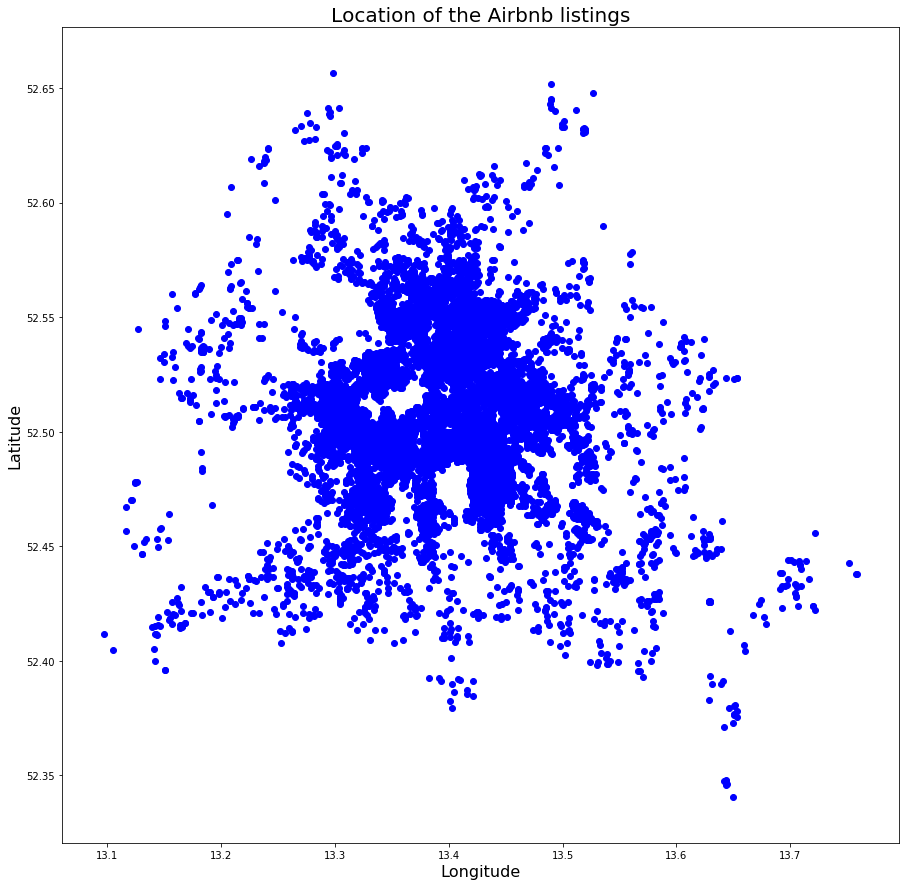

In [35]:
#A first with matplotlib delivers a rough picture, but this plot does not yet differentiate neighbourhoods
plt.figure(figsize=(15,15))
#We employ the longitude and latitude as coordinates
plt.scatter(x=df_listings['longitude'], y=df_listings['latitude'],  color='b');
plt.xlabel('Longitude',fontsize = 16)
plt.ylabel('Latitude',fontsize = 16)
plt.title("Location of the Airbnb listings",fontsize = 20);

After consulting the documentation on scatter plots and skimming through various stackoverflow posts, I came to the conclussion that **seaborns scatter plot** is better suited to visualise the neighbourhouds, as it is possible to indicate different neighbourhoods by colour (hue).

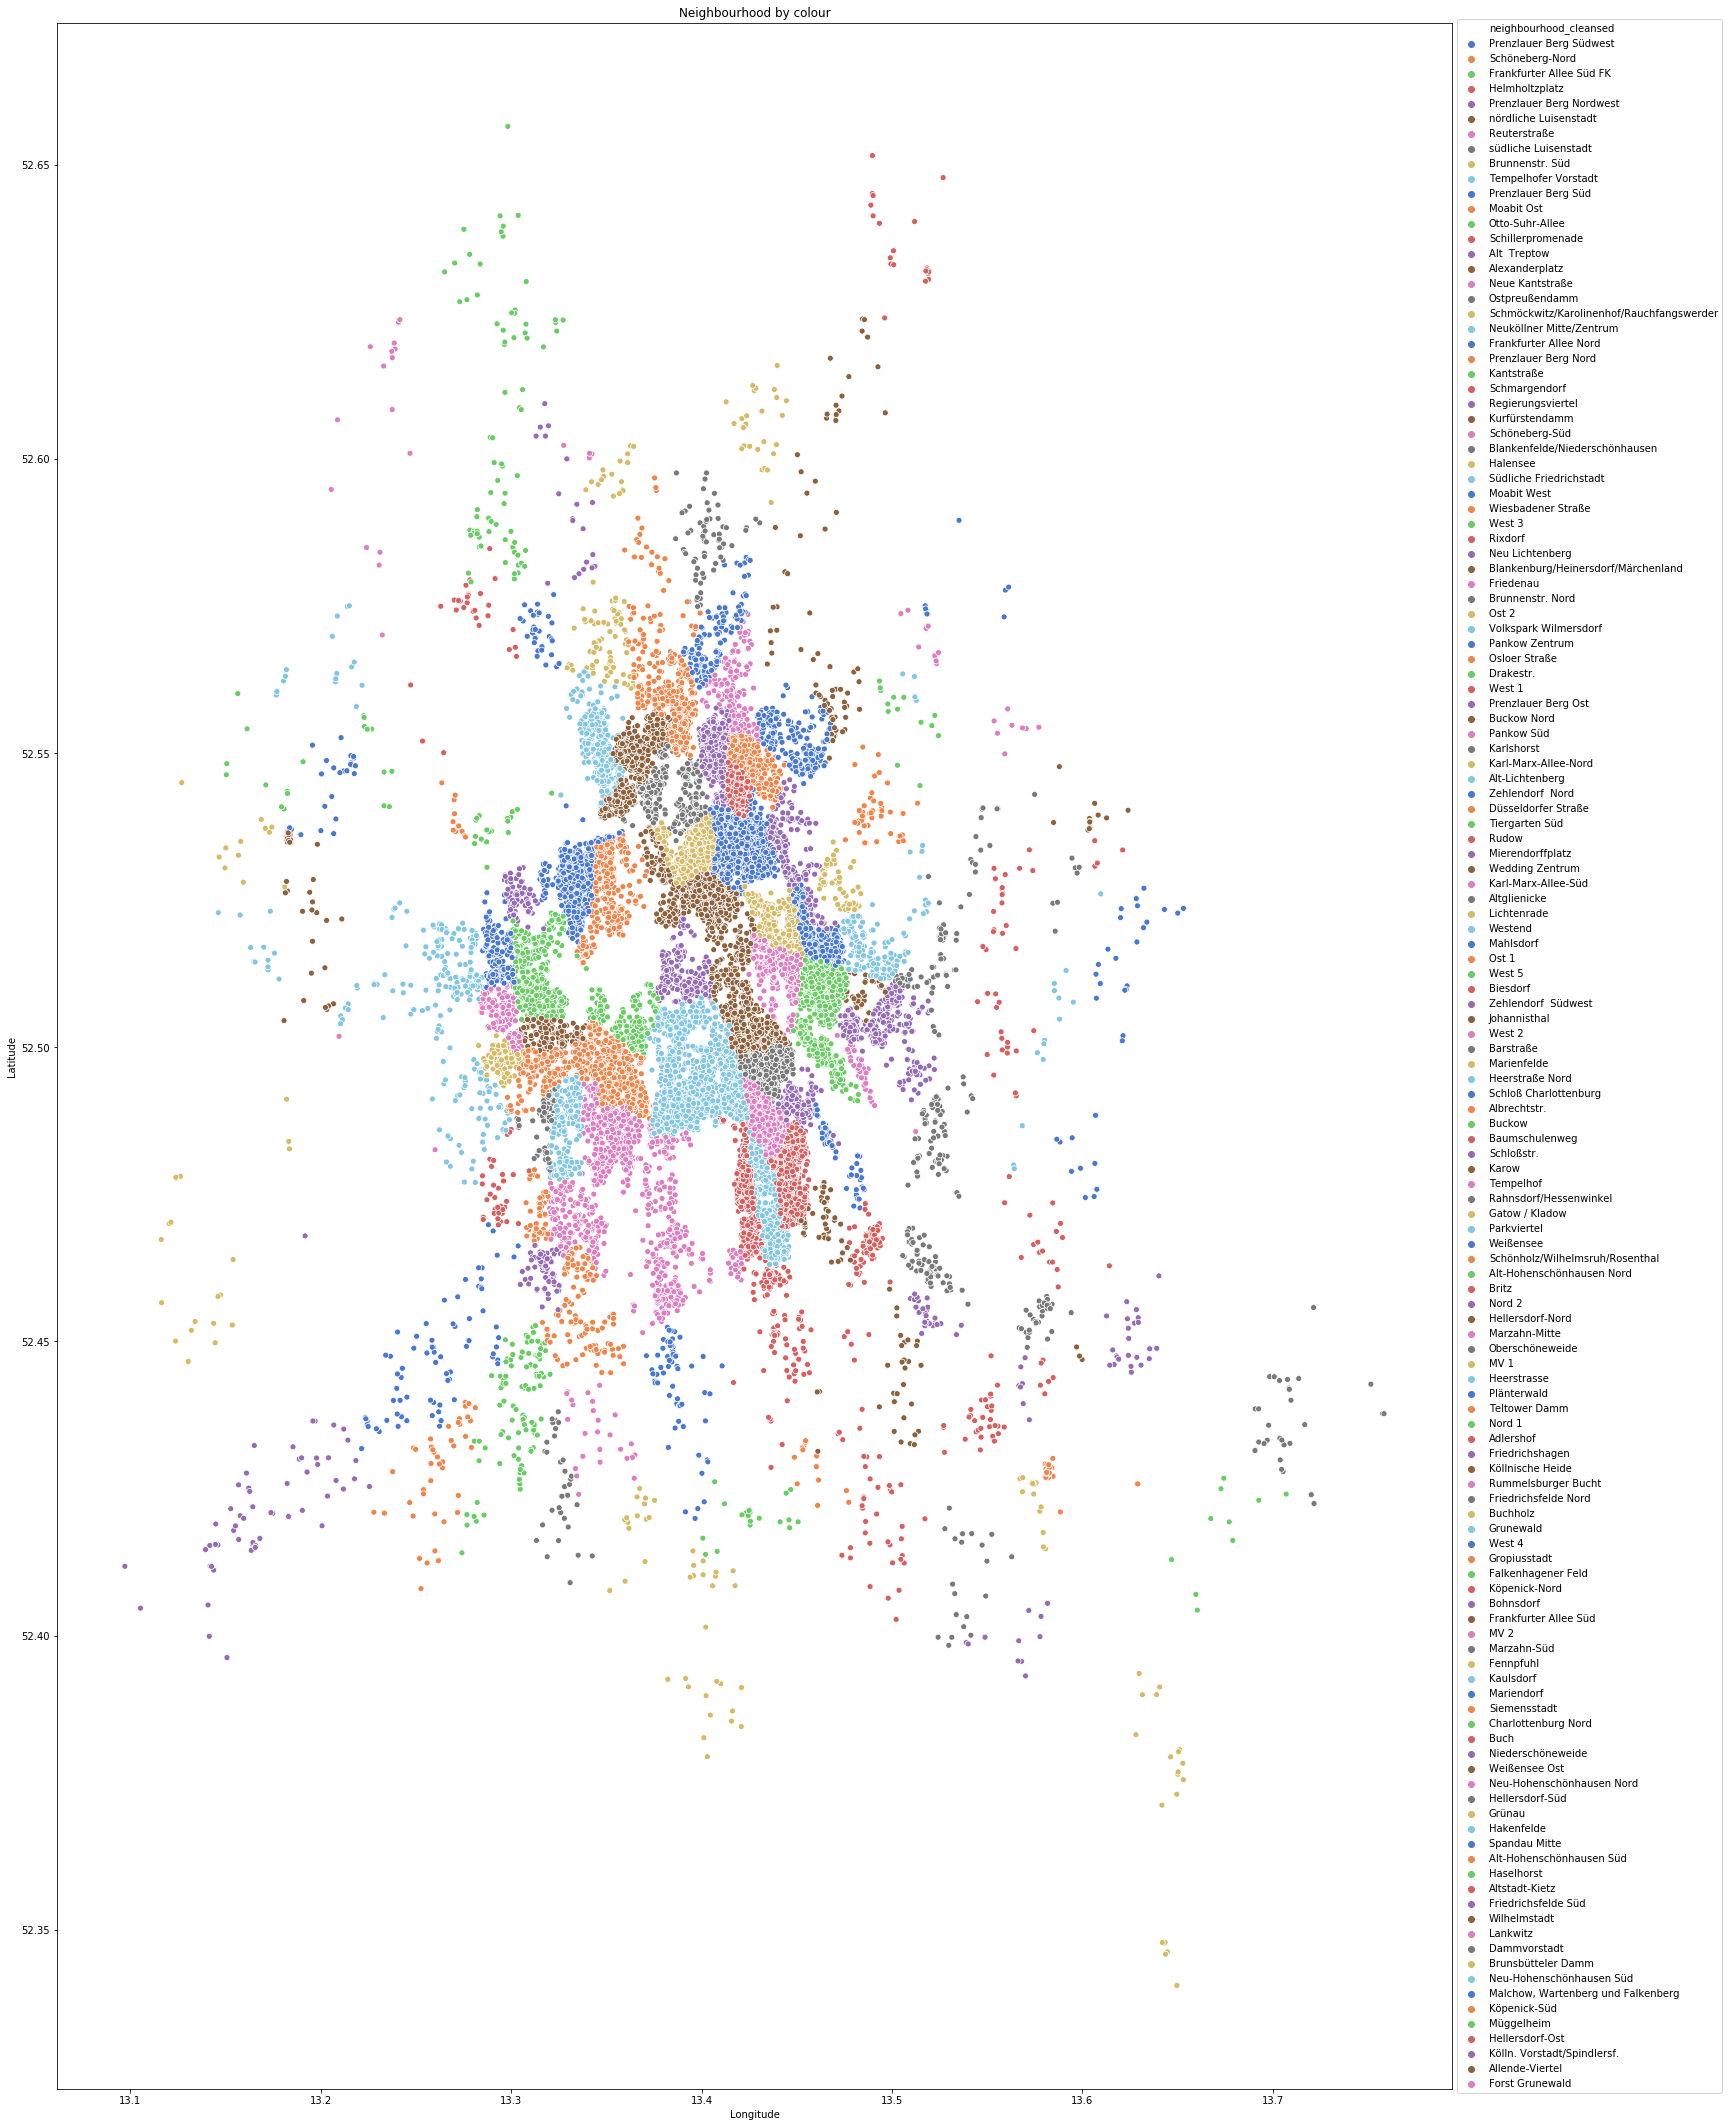

In [36]:
plt.figure(figsize=(25,38))#bigger plot to spread out the map abit
ax=sns.scatterplot(x=df_listings['longitude'], y=df_listings['latitude'], data=df_listings, hue=df_listings['neighbourhood_cleansed'], palette='muted');
ax.set(xlabel='Longitude', ylabel='Latitude',title = 'Neighbourhood by colour');
ax.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1);

While this plot is pretty to look at, it is quite large. Furthermore, it is not possible yet to discern any price pattern this way. We should try to scatter plot the data, but instead of visualising the neighbourhoods, we should indicate the prices by colour. My attempt to plot this is by **employing a combination out of scatter plot and binning**.

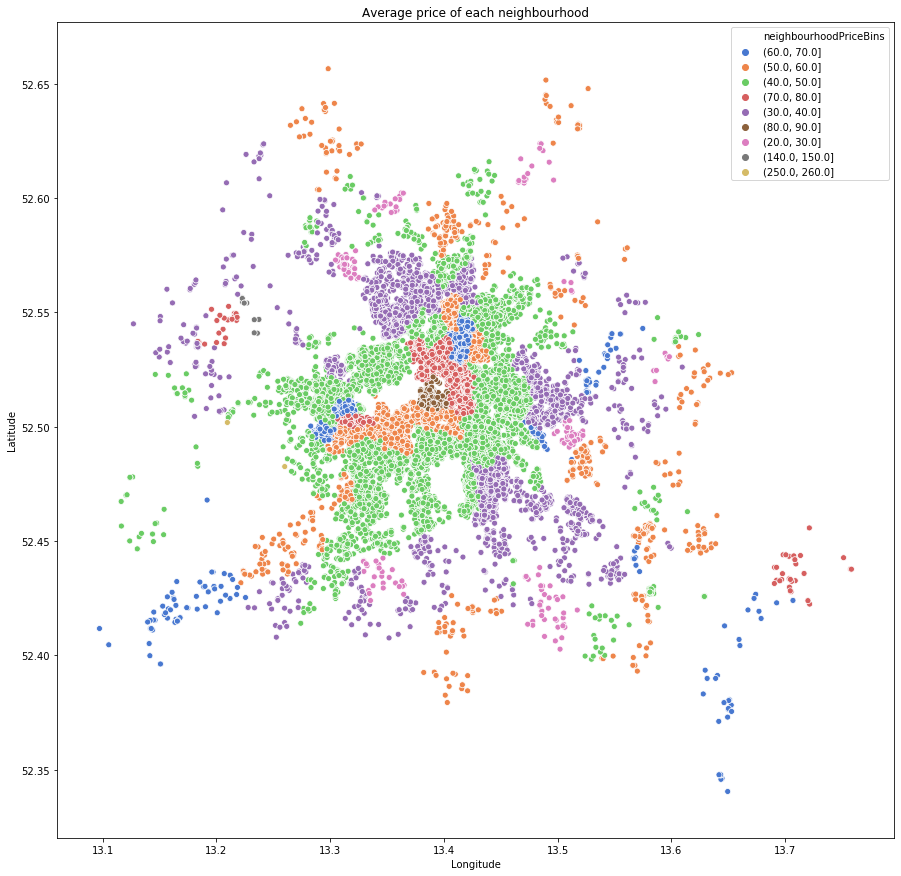

In [37]:
#bins are generated from the price values
bins = np.arange(df_listings['price'].min(), 500 + 60, 10)


#Again we employ the median price, since it was indentified as more useful metric
df_listings['avPricePerNeighbourhood'] = df_listings.groupby('neighbourhood_cleansed').transform('median')['price']
#the pandas.cut() method is useful for binning data from dataframes
df_listings['neighbourhoodPriceBins'] = pd.cut(df_listings['avPricePerNeighbourhood'], bins)
fig=plt.figure(figsize=(15,15))
ax=sns.scatterplot(x=df_listings['longitude'], y=df_listings['latitude'], data=df_listings, hue='neighbourhoodPriceBins', palette='muted',legend='full');
ax.set(xlabel='Longitude', ylabel='Latitude',title = 'Average price of each neighbourhood');

This plot shows, that the price dependency on the neighbourhood seems to be somewhat related to its position on the map. However, the exact relation is not clear. Let's follow up on this.

### Is the price dependency of the neighbourhood related to the distance from the city center?

We will analyze this by assuming the city center is equal to the Euclidean center of the city and then calculating a distance value for each listing location. This distance will be correlated with the price.

Correlation between distance from the mean center and price: 0.035703221898279604
Correlation between distance from the averaged center and price: 0.035703210240609885


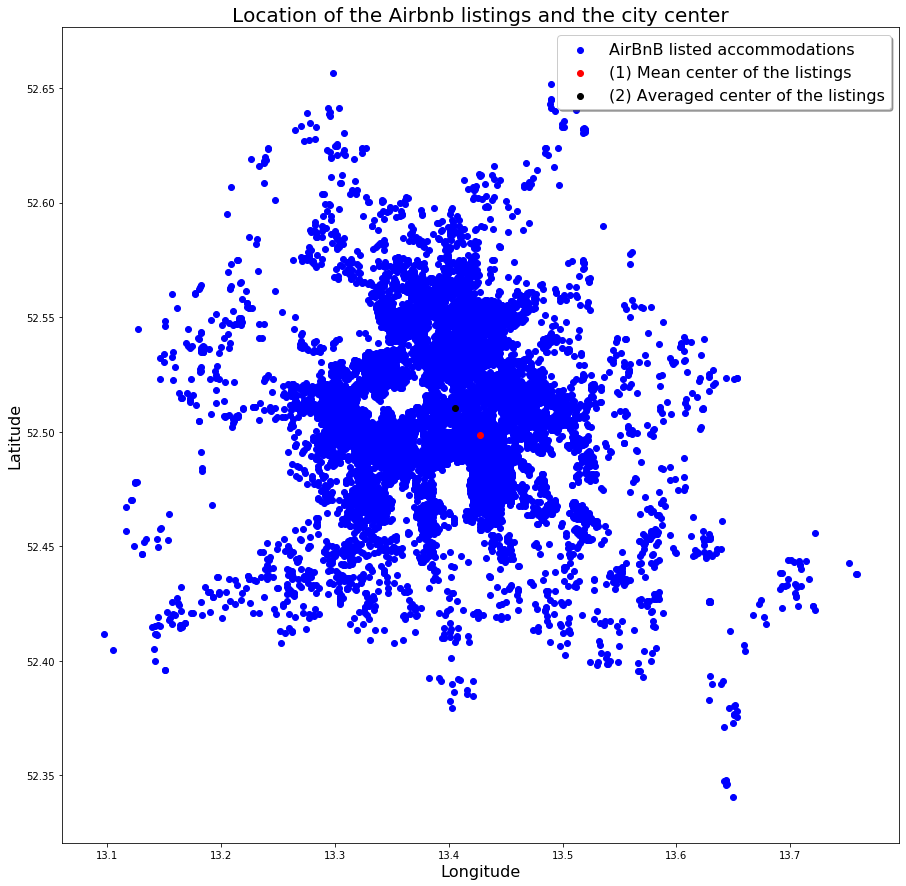

In [38]:
#Reminder: x=df_listings['longitude'], y=df_listings['latitude']

#calculate the center of Berlin by method (1): mean of the distance between (maxX,maxY) and (minX,minY), respectively.
centerX=(df_listings['longitude'].max()+df_listings['longitude'].min())/2
centerY=(df_listings['latitude'].max()+df_listings['latitude'].min())/2

#calculate the center of Berlin by method (2): average of all x and y coordinates
averageX=df_listings['longitude'].mean()
averageY=df_listings['latitude'].mean()



#Calculate the distance for from the center for each listing - Distance= square(dx^2+dy^2)
df_listings['simpleDistance']=np.sqrt(np.square(df_listings['longitude']-centerX)+np.square(df_listings['longitude']-centerY))
df_listings['averagedDistance']=np.sqrt(np.square(df_listings['longitude']-averageX)+np.square(df_listings['longitude']-averageY))

#Correlate distance and price for listings
print('Correlation between distance from the mean center and price:',df_listings['simpleDistance'].corr(df_listings['price']))
print('Correlation between distance from the averaged center and price:',df_listings['averagedDistance'].corr(df_listings['price']))

##plot the data with geo-middle point
fig, ax= plt.subplots(figsize=(15,15))

#plot the data
plt.scatter(x=df_listings['longitude'], y=df_listings['latitude'],  color='b',label='AirBnB listed accommodations');
plt.scatter(x=centerX, y=centerY,  color='r',label='(1) Mean center of the listings');
plt.scatter(x=averageX, y=averageY,  color='black',label='(2) Averaged center of the listings');

#create the legend
legend = ax.legend(loc='upper right', shadow=True,frameon=True,fontsize=16)
frame = legend.get_frame()
frame.set_facecolor('1.0')

#set the axis labels and the title
plt.xlabel('Longitude',fontsize = 16)
plt.ylabel('Latitude',fontsize = 16)
plt.title("Location of the Airbnb listings and the city center",fontsize = 20);

The plot shows the position of both assumed city centers and the listings. The low correlation value for the both distances in relation to the price proves, that there is only a negligible correlation.

### To Summarize the neighbourhood dependancy

The neighbourhood has a big impact on the price. However, while this can be shown to be somewhat related to the listings position on the map, the exact relation is not clear. We have proven, that there is no direct correlation between price and distance to the (assumed) city center. A likely reason for this is, that Berlin is a huge and old city with many relevant sightseeing locations or features. **Thus, the price might not be a simple function of distance and likely based on the neighbourhoods reputation.**

## Question 4: Are the prices of the listings related to the review scores?

We can simply form a correlation matrix between the review scores and the price with pandas. The result can be plottet employing seaborns heatmap.

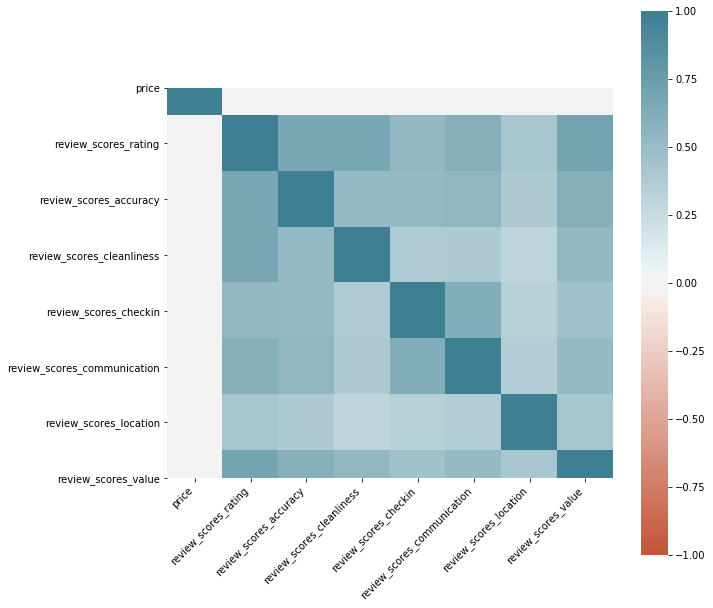

In [39]:
##lets generate the correlation matrix
corr=df_reviewScores.corr()

#Lets plot the data with seaborn
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True)
#Setting some options to heighten the readability
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

The heatmap reveals, that there is no price correlation with any of the review metrics. This is quite surprising!

# Summary of the results

We have analyzed AirBnB data from the city of Berlin for the time period between 18. February of 2020 and 17. February of 2021.

* The data reveals, that the average (mean) overnight stay price per night is 80 \\$. This value is, however, heavily influenced by the more expensive listings. 

* The median overnight stay price is 50 \\$, which is realistic from my experience.
* The price is influenced by the week day (Friday and Saturdays are more expensive) and the month (January is the most expensive, March the cheapest month).
* The neighbourhood has a big impact on the price. However, the value seems to be no clear function of the distance to the (assumed) city center.
* None of the review score metrics have any impact on the price, which is quite a surprise. So overall, the quality of the listings is comparable for different price ranges.